In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
import random
from sklearn.feature_selection import SequentialFeatureSelector #Para stepwise
from sklearn.linear_model import RidgeCV, Ridge #Para Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from ydata_profiling import ProfileReport

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')
random.seed(123)

In [125]:
hospital_df = pd.read_csv('risk_factors_cervical_cancer.csv', encoding='latin1')
hospital_df = hospital_df.replace('?', None)
hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')
hospital_df.head()

/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_4040/2281367633.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')


Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                      15.0   
1   15                        1.0                      14.0   
2   34                        1.0                       NaN   
3   52                        5.0                      16.0   
4   46                        3.0                      21.0   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                              0.0  0.0  ...   
2                      0.0                              0.0  0.0  ...   
3                      1.0                              3.0  0.0  ...   
4                      1.0                             15.0  0.0  ...   

   STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
0          0       0       0   0           0         0         0       0  
1          0       0       0   0           0         0         0       0  
2          0       0       0   0           0         0         0       0  
3          1       0       1   0           0         0         0       0  
4          0       0       0   0           0         0         0       0  

[5 rows x 36 columns]

In [126]:
hospital_df.describe()

Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 832.000000                851.000000   
mean    26.820513                   2.527644                 16.995300   
std      8.497948                   1.667760                  2.803355   
min     13.000000                   1.000000                 10.000000   
25%     20.000000                   2.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.226610   
min              0.000000    0.000000        0.000000             0.000000   
25%              1.000000    0.000000        0.000000             0.000000   
50%              2.000000    0.000000        0.000000             0.000000   
75%              3.000000    0.000000        0.000000             0.000000   
max             11.000000    1.000000       37.000000            37.000000   

       Hormonal Contraceptives  Hormonal Contraceptives (years)         IUD  \
count               750.000000                       750.000000  741.000000   
mean                  0.641333                         2.256419    0.112011   
std                   0.479929                         3.764254    0.315593   
min                   0.000000                         0.000000    0.000000   
25%                   0.000000                         0.000000    0.000000   
50%                   1.000000                         0.500000    0.000000   
75%                   1.000000                         3.000000    0.000000   
max                   1.000000                        30.000000    1.000000   

       ...  STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
count  ...                         71.000000                        71.000000   
mean   ...                          6.140845                         5.816901   
std    ...                          5.895024                         5.755271   
min    ...                          1.000000                         1.000000   
25%    ...                          2.000000                         2.000000   
50%    ...                          4.000000                         3.000000   
75%    ...                          8.000000                         7.500000   
max    ...                         22.000000                        22.000000   

        Dx:Cancer      Dx:CIN      Dx:HPV          Dx  Hinselmann    Schiller  \
count  858.000000  858.000000  858.000000  858.000000  858.000000  858.000000   
mean     0.020979    0.010490    0.020979    0.027972    0.040793    0.086247   
std      0.143398    0.101939    0.143398    0.164989    0.197925    0.280892   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Citology      Biopsy  
count  858.000000  858.000000  
mean     0.051282    0.064103  
std      0.220701    0.245078  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      1.000000    1.000000  

[8 rows x 36 columns]

In [127]:
# cast object Dtype to float & remain the int64
hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')
hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_4040/1224013655.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  hospital_df = hospital_df.apply(pd.to_numeric, errors='ignore')


In [128]:
# analysis = ProfileReport(hospital_df)
# analysis.to_file('analysis.html')

### Obtenemos las variables numéricas

In [129]:
numerics_columns = hospital_df.select_dtypes(include=['float64', 'int64'])
print(numerics_columns.columns.values)

['Age' 'Number of sexual partners' 'First sexual intercourse'
 'Num of pregnancies' 'Smokes' 'Smokes (years)' 'Smokes (packs/year)'
 'Hormonal Contraceptives' 'Hormonal Contraceptives (years)' 'IUD'
 'IUD (years)' 'STDs' 'STDs (number)' 'STDs:condylomatosis'
 'STDs:cervical condylomatosis' 'STDs:vaginal condylomatosis'
 'STDs:vulvo-perineal condylomatosis' 'STDs:syphilis'
 'STDs:pelvic inflammatory disease' 'STDs:genital herpes'
 'STDs:molluscum contagiosum' 'STDs:AIDS' 'STDs:HIV' 'STDs:Hepatitis B'
 'STDs:HPV' 'STDs: Number of diagnosis' 'STDs: Time since first diagnosis'
 'STDs: Time since last diagnosis' 'Dx:Cancer' 'Dx:CIN' 'Dx:HPV' 'Dx'
 'Hinselmann' 'Schiller' 'Citology' 'Biopsy']


### Contar la cantidad de campos numéricos

In [130]:
num_int64_columns = len(numerics_columns.columns.values)
print(num_int64_columns)

36


In [131]:
numeric = hospital_df[numerics_columns.columns.values]
# replace ? with 0
# numeric = numeric.replace('?', None)
numeric

Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
2                   1.0     0.0             0.0                  0.0   
3                   4.0     1.0            37.0                 37.0   
4                   4.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
853                 0.0     0.0             0.0                  0.0   
854                 1.0     0.0             0.0                  0.0   
855                 0.0     0.0             0.0                  0.0   
856                 2.0     0.0             0.0                  0.0   
857                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                             0.00  0.0  ...   
1                        0.0                             0.00  0.0  ...   
2                        0.0                             0.00  0.0  ...   
3                        1.0                             3.00  0.0  ...   
4                        1.0                            15.00  0.0  ...   
..                       ...                              ...  ...  ...   
853                      0.0                             0.00  0.0  ...   
854                      1.0                             8.00  0.0  ...   
855                      1.0                             0.08  0.0  ...   
856                      1.0                             0.08  0.0  ...   
857                      1.0                             0.50  0.0  ...   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
..                                ...                              ...   
853                               NaN                              NaN   
854                               NaN                              NaN   
855                               NaN                              NaN   
856                               NaN                              NaN   
857                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
0            0       0       0   0           0         0         0       0  
1            0       0       0   0           0         0         0       0  
2            0       0       0   0           0         0         0       0  
3            1       0       1   0           0         0         0       0  
4            0       0       0   0           0         0         0       0  
..         ...     ...     ...  ..         ...       ...       ...     ...  
853          0       0       0

In [132]:
null_counts = numeric.isnull().sum()
null_counts[null_counts > 0].count()

26

In [133]:
zero_counts = (numeric == 0).sum()
zero_counts[zero_counts > 650]

Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                      752
STDs:HPV                              751
STDs: Number of diagnosis             787
Dx:Cancer                             840
Dx:CIN                                849
Dx:HPV                                840
Dx                                

In [134]:
zero_counts[zero_counts > 0].count()

31

In [135]:
zero_counts[zero_counts > 650]

Smokes                                722
Smokes (years)                        722
Smokes (packs/year)                   722
IUD                                   658
IUD (years)                           658
STDs                                  674
STDs (number)                         674
STDs:condylomatosis                   709
STDs:cervical condylomatosis          753
STDs:vaginal condylomatosis           749
STDs:vulvo-perineal condylomatosis    710
STDs:syphilis                         735
STDs:pelvic inflammatory disease      752
STDs:genital herpes                   752
STDs:molluscum contagiosum            752
STDs:AIDS                             753
STDs:HIV                              735
STDs:Hepatitis B                      752
STDs:HPV                              751
STDs: Number of diagnosis             787
Dx:Cancer                             840
Dx:CIN                                849
Dx:HPV                                840
Dx                                

<Axes: >

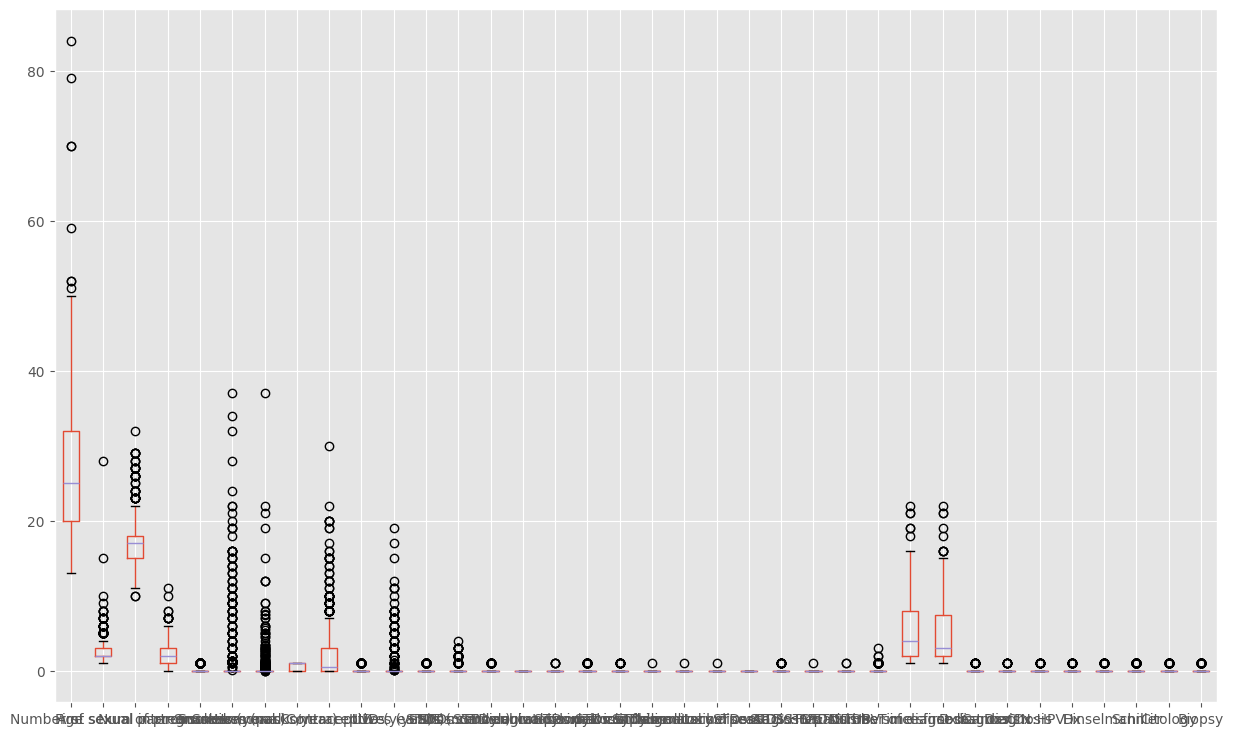

In [136]:
numeric.boxplot()

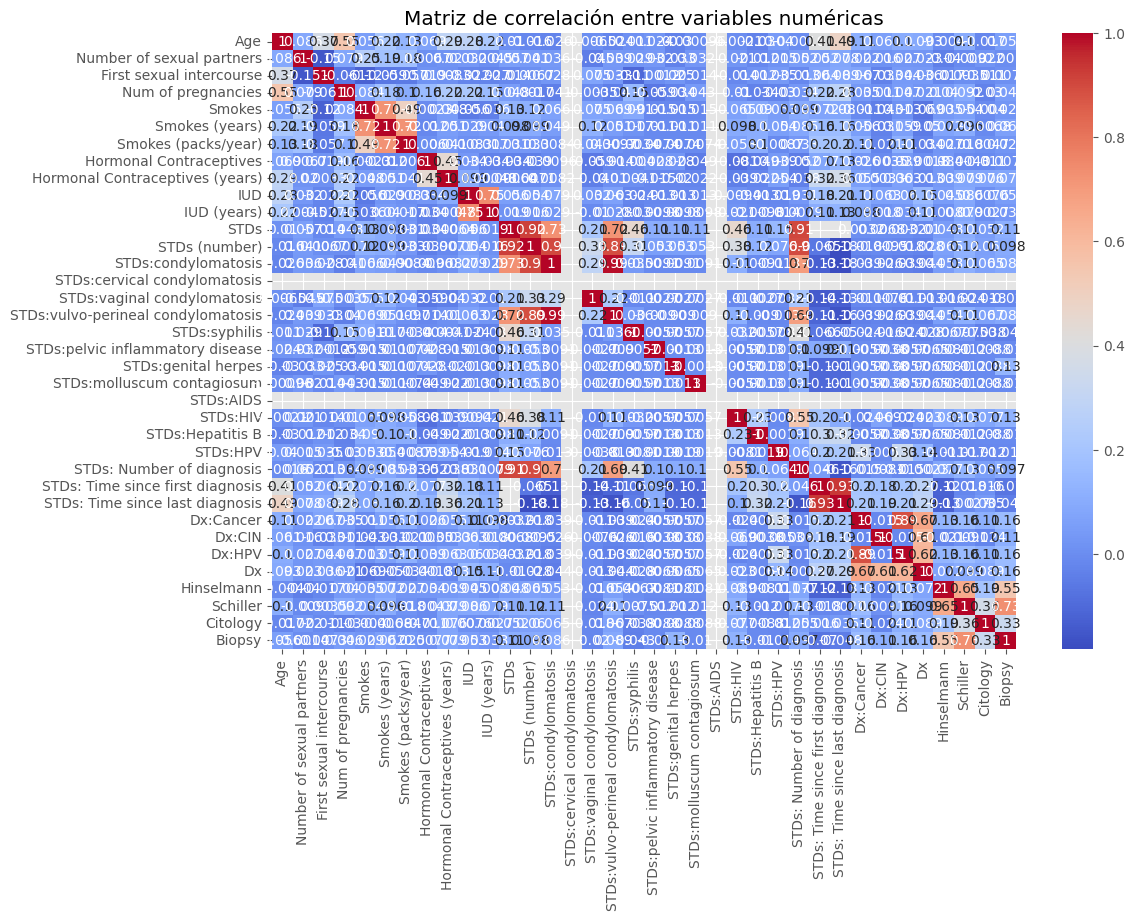

In [137]:
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [138]:
g = sns.PairGrid(numeric)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [139]:
def graphNumericDistribution(data, title, xlabel, ylabel):
    # Ensure data is numeric and drop NaN values
    data = data.dropna().apply(pd.to_numeric, errors='coerce').dropna()
    
    # Calculate statistics
    mean = round(data.mean(), 2)
    median = round(data.median(), 2)
    mode_result = data.mode()
    if not mode_result.empty:
        mode = round(mode_result.iloc[0], 2)  # Safely handle mode; take first if multiple
    else:
        mode = "N/A"
    max_value = round(data.max(), 2)
    min_value = round(data.min(), 2)
    
    # Plotting
    plt.figure()
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='--', label='Median')
    plt.legend()

    # Adjust text placement and handle mode display
    plt.text(0.98, 0.82, f'Mean: {mean}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.76, f'Median: {median}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.70, f'Mode: {mode}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.64, f'Max: {max_value}', transform=plt.gca().transAxes, ha='right', va='top')
    plt.text(0.98, 0.58, f'Min: {min_value}', transform=plt.gca().transAxes, ha='right', va='top')

count    858.000000
mean      26.820513
std        8.497948
min       13.000000
25%       20.000000
50%       25.000000
75%       32.000000
max       84.000000
Name: Age, dtype: float64


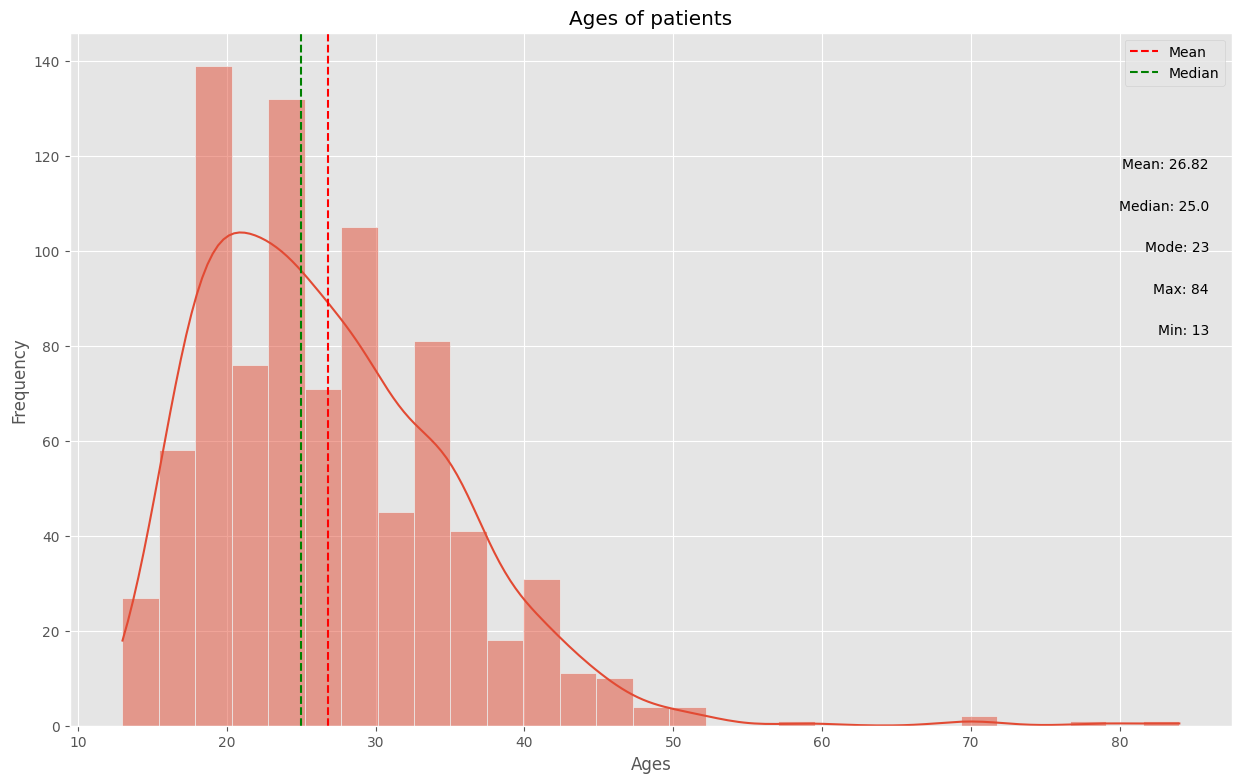

In [140]:
ages = numeric['Age']
graphNumericDistribution(ages, 'Ages of patients', 'Ages', 'Frequency')
print(ages.describe())

In [141]:
numeric
# sexPartners = numeric['Number of sexual partners']
# graphNumericDistribution(sexPartners, "Patients' Number of sexual partners", 'Ages', 'Frequency')

Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
2     34                        1.0                       NaN   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
..   ...                        ...                       ...   
853   34                        3.0                      18.0   
854   32                        2.0                      19.0   
855   25                        2.0                      17.0   
856   33                        2.0                      24.0   
857   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0             0.0                  0.0   
2                   1.0     0.0             0.0                  0.0   
3                   4.0     1.0            37.0                 37.0   
4                   4.0     0.0             0.0                  0.0   
..                  ...     ...             ...                  ...   
853                 0.0     0.0             0.0                  0.0   
854                 1.0     0.0             0.0                  0.0   
855                 0.0     0.0             0.0                  0.0   
856                 2.0     0.0             0.0                  0.0   
857                 1.0     0.0             0.0                  0.0   

     Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                        0.0                             0.00  0.0  ...   
1                        0.0                             0.00  0.0  ...   
2                        0.0                             0.00  0.0  ...   
3                        1.0                             3.00  0.0  ...   
4                        1.0                            15.00  0.0  ...   
..                       ...                              ...  ...  ...   
853                      0.0                             0.00  0.0  ...   
854                      1.0                             8.00  0.0  ...   
855                      1.0                             0.08  0.0  ...   
856                      1.0                             0.08  0.0  ...   
857                      1.0                             0.50  0.0  ...   

     STDs: Time since first diagnosis  STDs: Time since last diagnosis  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
..                                ...                              ...   
853                               NaN                              NaN   
854                               NaN                              NaN   
855                               NaN                              NaN   
856                               NaN                              NaN   
857                               NaN                              NaN   

     Dx:Cancer  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  Citology  Biopsy  
0            0       0       0   0           0         0         0       0  
1            0       0       0   0           0         0         0       0  
2            0       0       0   0           0         0         0       0  
3            1       0       1   0           0         0         0       0  
4            0       0       0   0           0         0         0       0  
..         ...     ...     ...  ..         ...       ...       ...     ...  
853          0       0       0

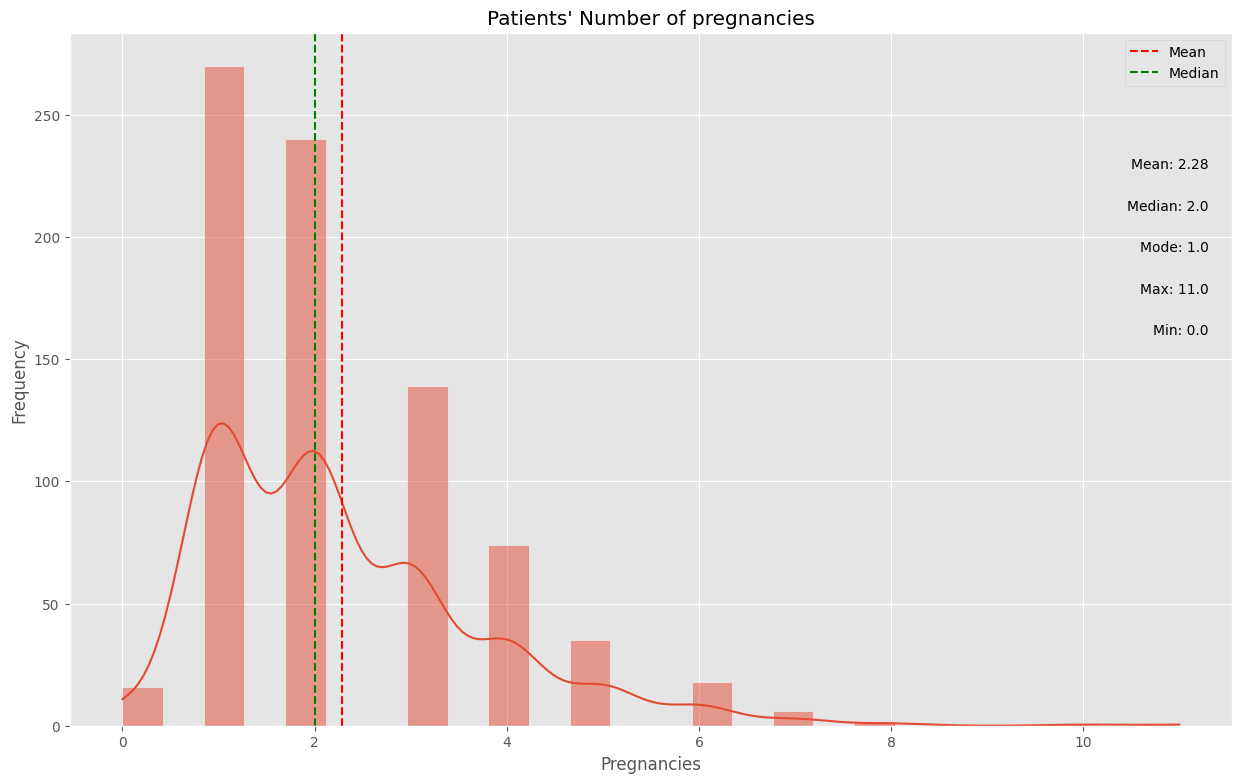

In [142]:
data = numeric['Num of pregnancies']
graphNumericDistribution(data, "Patients' Number of pregnancies", 'Pregnancies', 'Frequency')

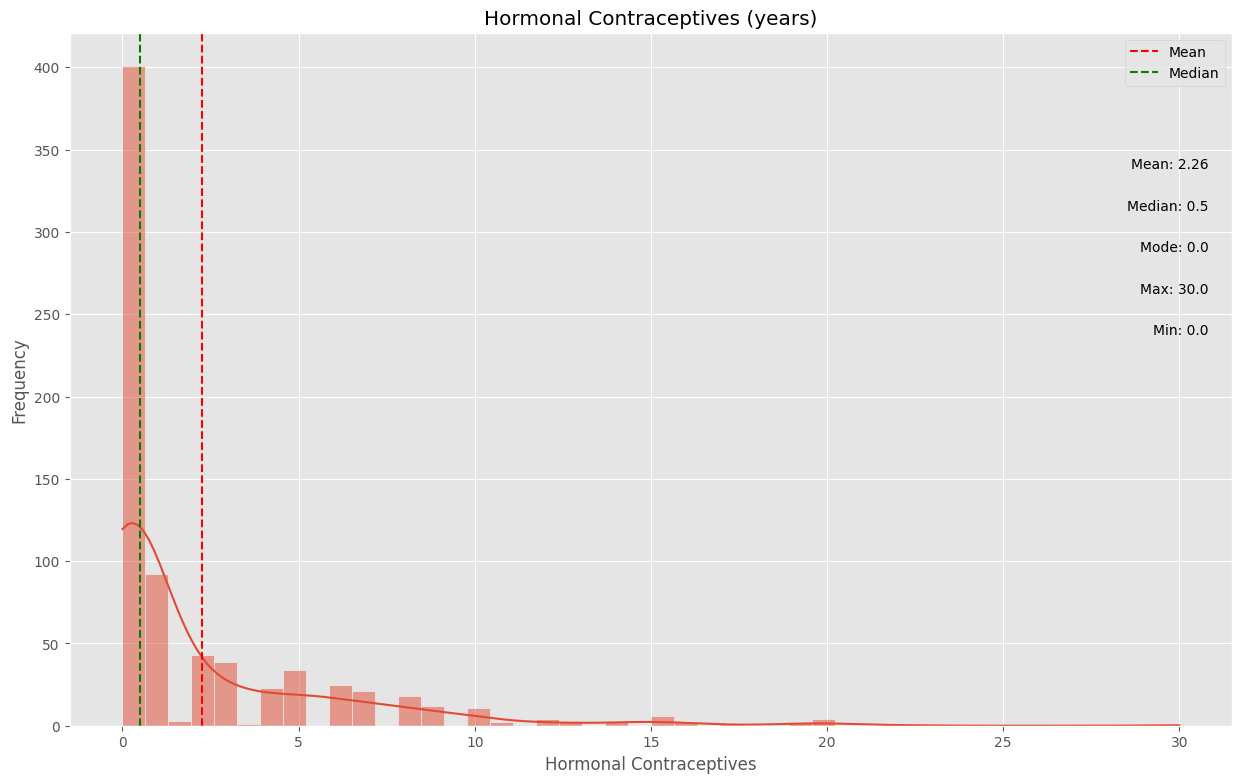

In [143]:
data = numeric['Hormonal Contraceptives (years)']
graphNumericDistribution(data, "Hormonal Contraceptives (years)", 'Hormonal Contraceptives', 'Frequency')

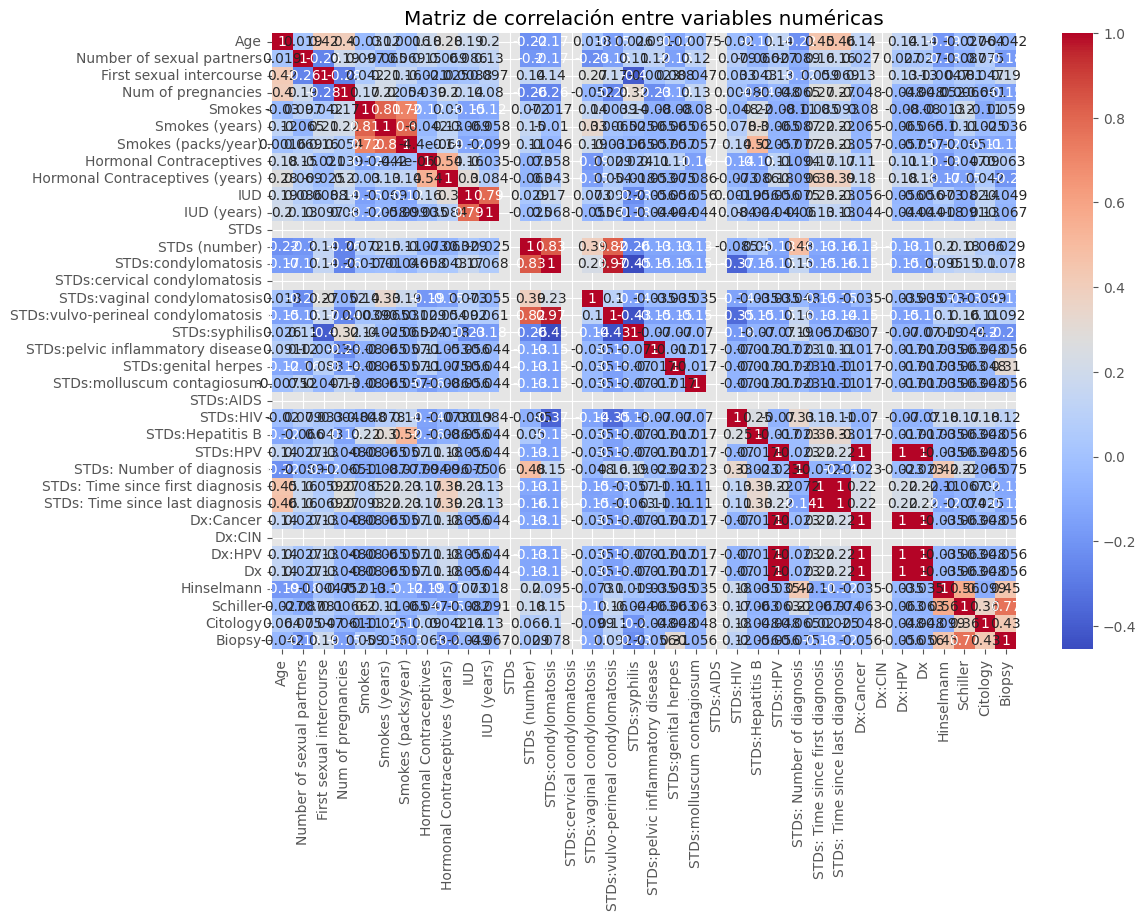

In [144]:
# isolate numeric variables from categorical
numeric = hospital_df.select_dtypes(include=['int64', 'float64']).dropna()
# make a correlation analysis between them
correlation_matrix = numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [145]:
# get categorical variables & make frequency tables, proportion tables, bar plots
categorical = hospital_df.select_dtypes(include=[object])
for column in categorical.columns:
    print("############################################")
    print(f"Results for {column}")
    print("############################################")
    # print the table in a visual way
    categorical[column].value_counts().plot(kind='bar')
    plt.title(f'{column} frequency')
    plt.show()
    # print the table in a visual way
    categorical[column].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'{column} proportion')
    plt.show()
    sns.countplot(x=column, data=categorical)
    plt.title(f'{column} frequency')
    plt.show()
    print('\n')

In [146]:
# Realizar one-hot encoding en las variables categóricas
categorical_columns = hospital_df.select_dtypes(include=[object]).columns
hospital_df_encoded = pd.get_dummies(hospital_df, columns=categorical_columns, drop_first=True)


# Unir las variables numéricas y categóricas codificadas
numeric = hospital_df.select_dtypes(include=['int64', 'float64'])
data_for_pca = pd.concat([numeric, hospital_df_encoded], axis=1)


In [161]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

cancerOrNot = hospital_df['Dx']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
hospital_df_imputed = imputer.fit_transform(hospital_df_encoded)

# Escalar los datos
scaler = StandardScaler()
hospital_df_scaled = scaler.fit_transform(hospital_df_imputed)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hospital_df_scaled)

# Graficar los resultados del PCA
# draw the two components with different color
plt.figure()
plt.scatter(x=pca_result[:, 0], y=pca_result[:, 1], s=pca_result[:,2], c=cancerOrNot)
# graph a 3D scatter
ax = plt.figure().add_subplot(projection='3d')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Componentes Principales con Variables Categóricas Transformadas')
plt.show()

# Varianza explicada
print("Varianza explicada por los primeros dos componentes:", np.sum(pca.explained_variance_ratio_))


IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 1500x900 with 0 Axes>

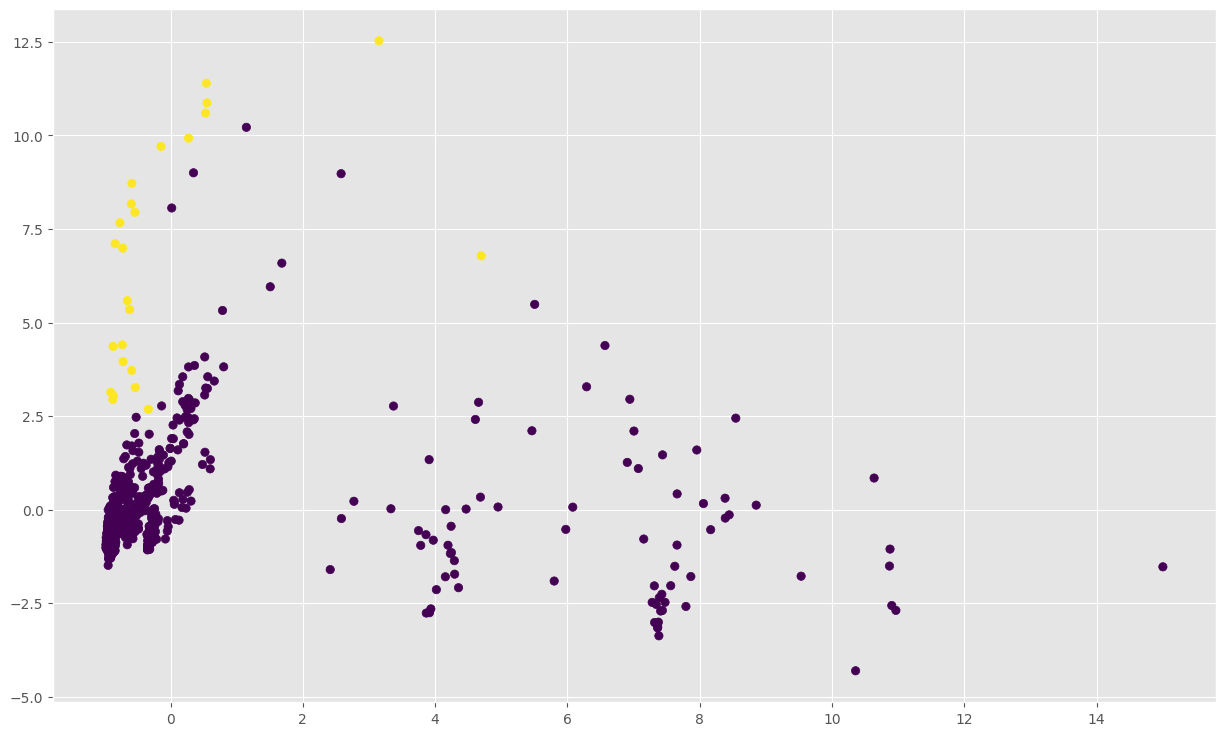

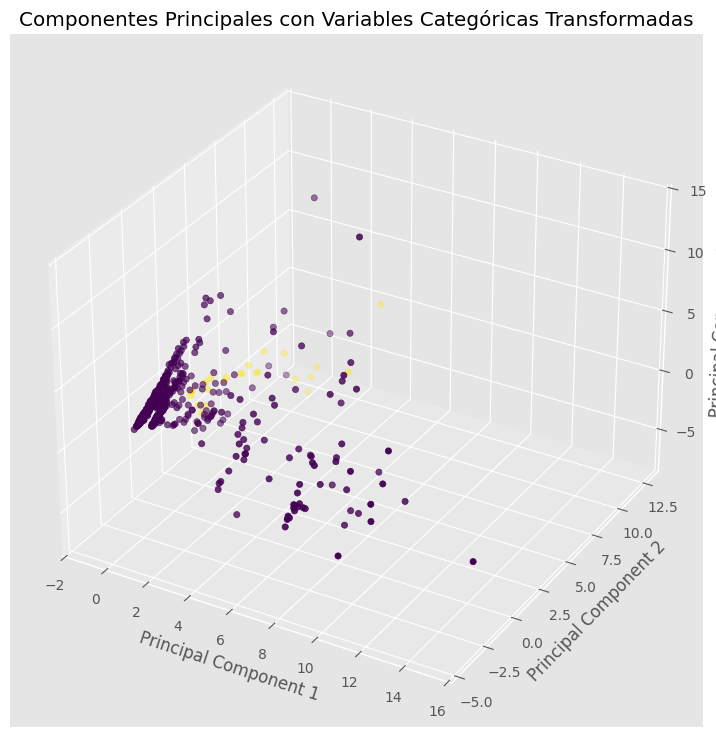

Varianza explicada por los primeros tres componentes: PCA(n_components=3)


In [163]:
scaler = StandardScaler()
hospitaldf_scaled = scaler.fit_transform(hospital_df)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(hospital_df_scaled)

plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cancerOrNot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cancerOrNot)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('Componentes Principales con Variables Categóricas Transformadas')
plt.show()

print("Varianza explicada por los primeros tres componentes:", np.sum(pca))

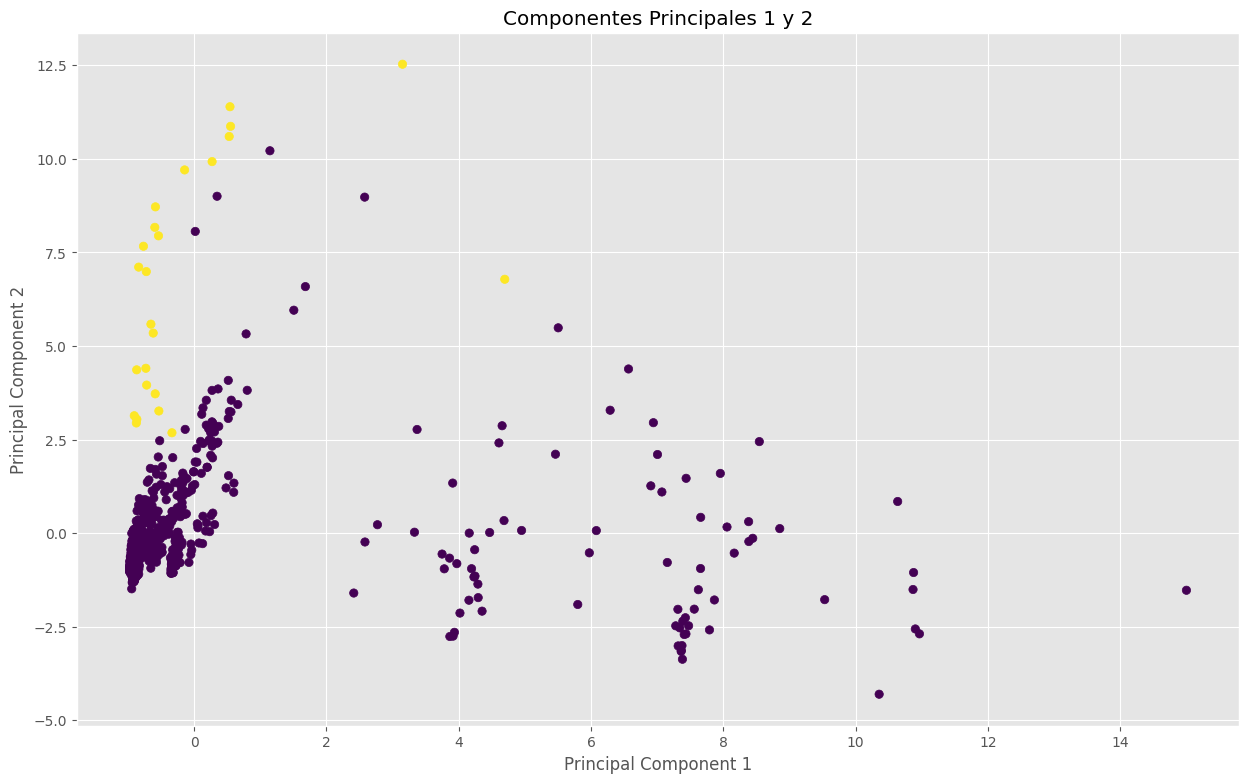

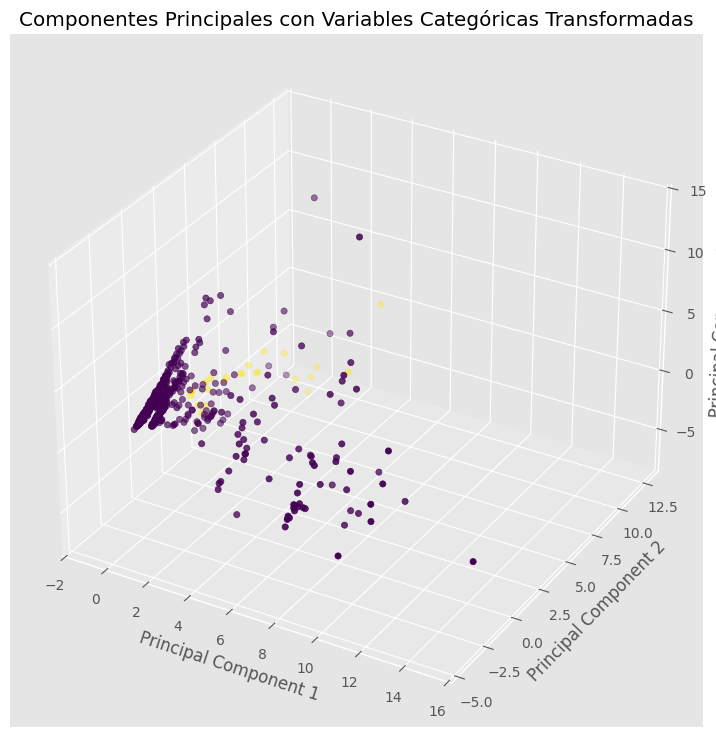

In [165]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Escalar los datos
scaler = StandardScaler()
hospitaldf_scaled = scaler.fit_transform(hospital_df)

# Aplicar PCA con 3 componentes
pca = PCA(n_components=3)
pca_result = pca.fit_transform(hospital_df_scaled)

# Varianza explicada por cada componente
# explained_variance = pca.explained_variance_ratio
# print("Varianza explicada por cada componente:", explained_variance)
# print("Varianza total explicada por los tres componentes:", np.sum(explained_variance))

# Graficar los resultados del PCA en 2D para verificar
plt.figure()
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cancerOrNot)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Componentes Principales 1 y 2')
plt.show()

# Graficar en 3D si el tercer componente está presente
if pca_result.shape[1] >= 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cancerOrNot)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title('Componentes Principales con Variables Categóricas Transformadas')
    plt.show()
else:
    print("El PCA no generó el tercer componente.")